In [13]:
import kagglehub
import shutil
import os

# Download the dataset
path = kagglehub.dataset_download("teertha/ushealthinsurancedataset")

#print("Path to dataset files:", path)
# Copy insurance.csv to the current directory
try:
  shutil.copy(path + "/insurance.csv", os.getcwd())
except shutil.Error as e:
  print("Cannot copy file: {}".format(e))

Using Colab cache for faster access to the 'ushealthinsurancedataset' dataset.


In [14]:
import pandas as pd

df = pd.read_csv('insurance.csv')
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [16]:
display(df.describe())
display(df.info())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [17]:
display(df.isnull().sum())

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


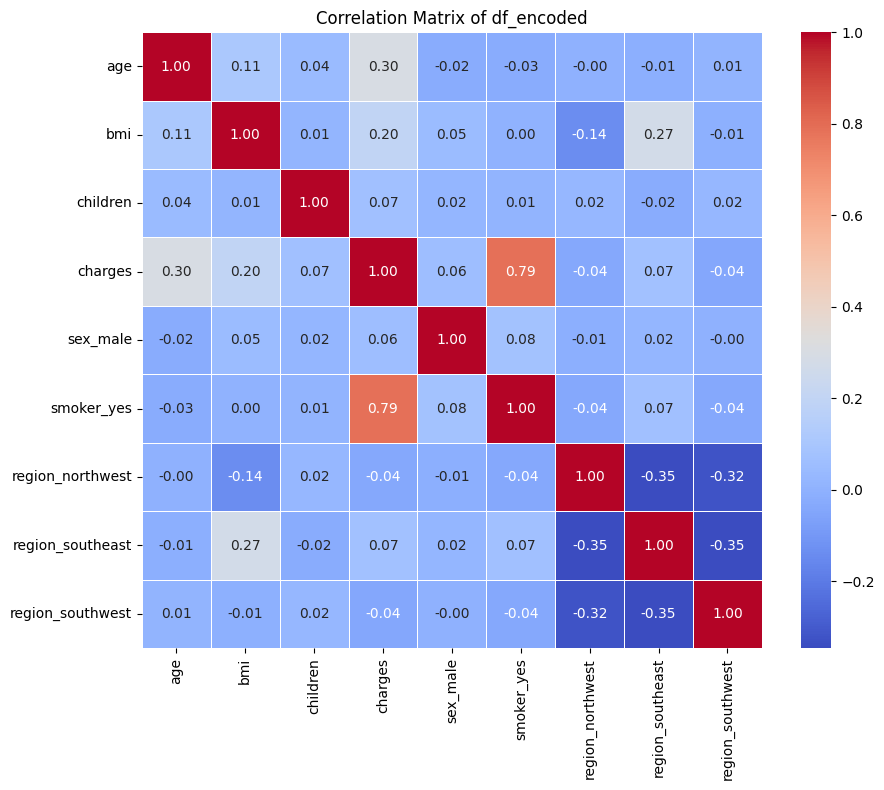

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_encoded')
plt.show()

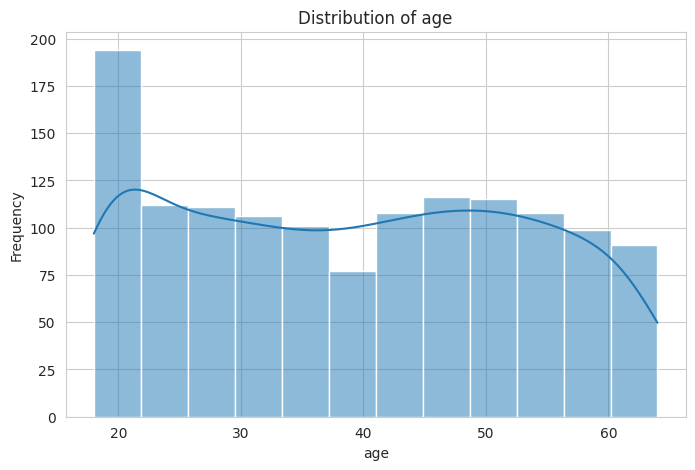

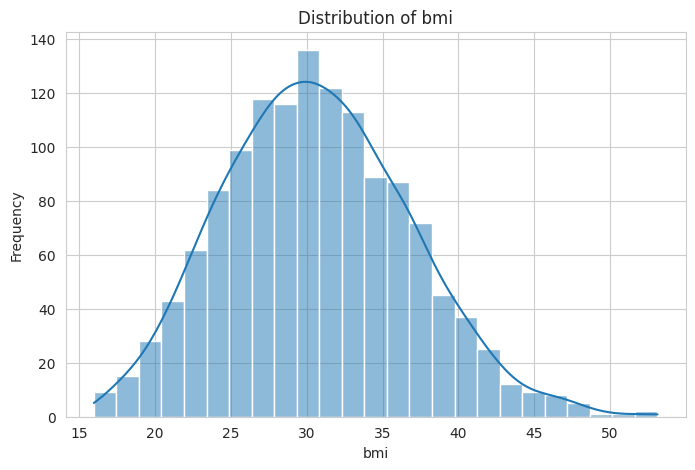

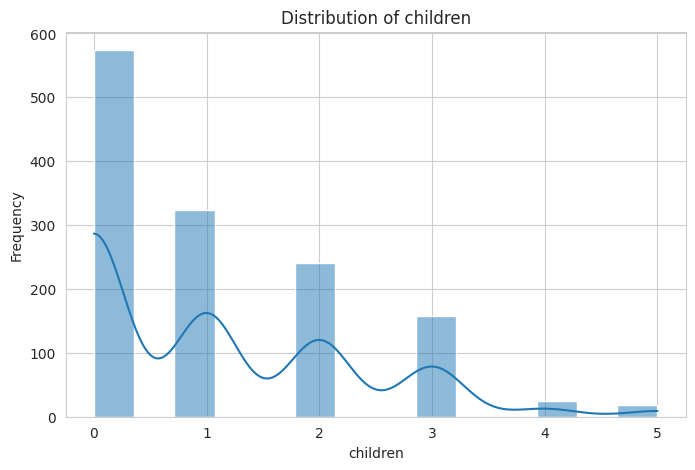

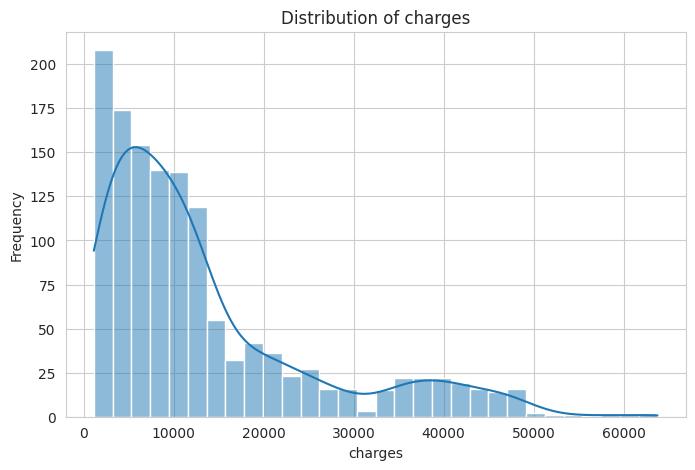

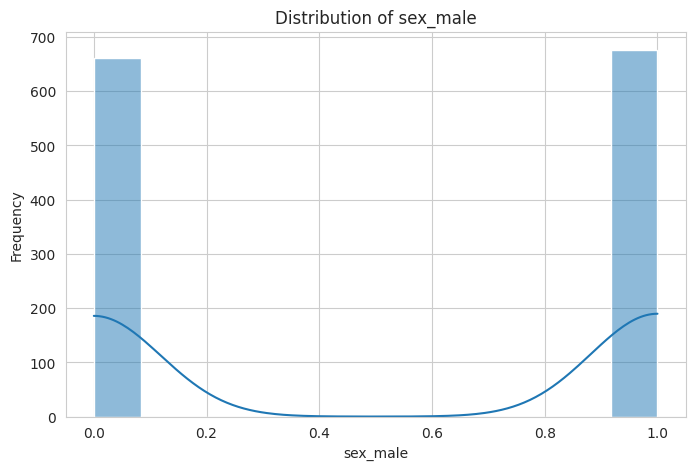

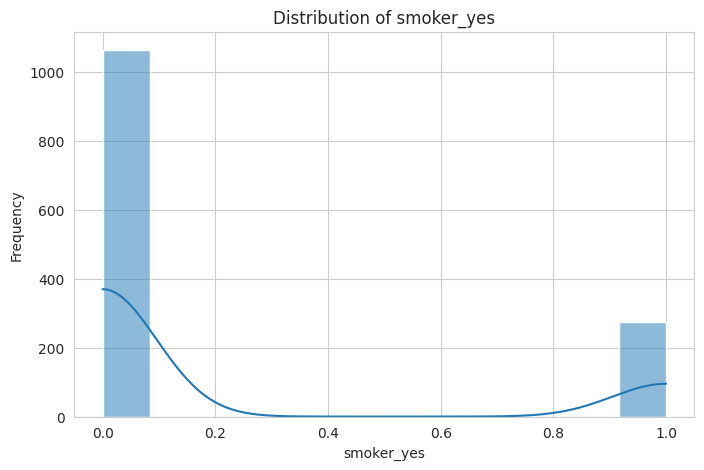

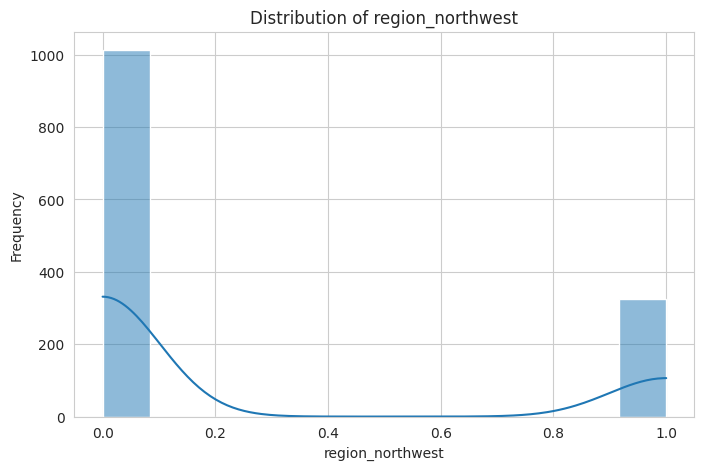

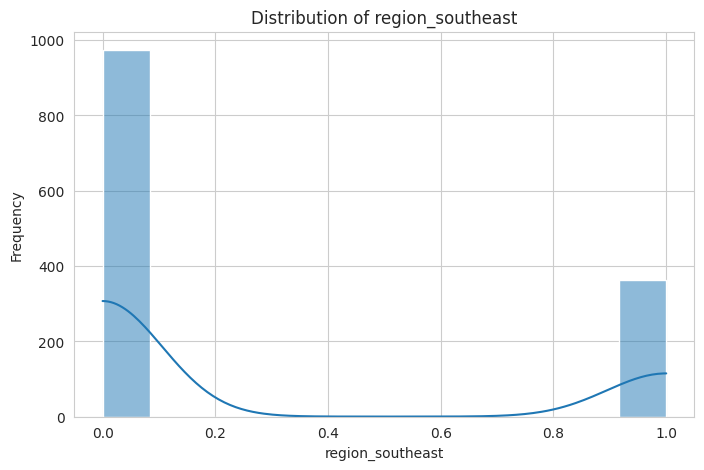

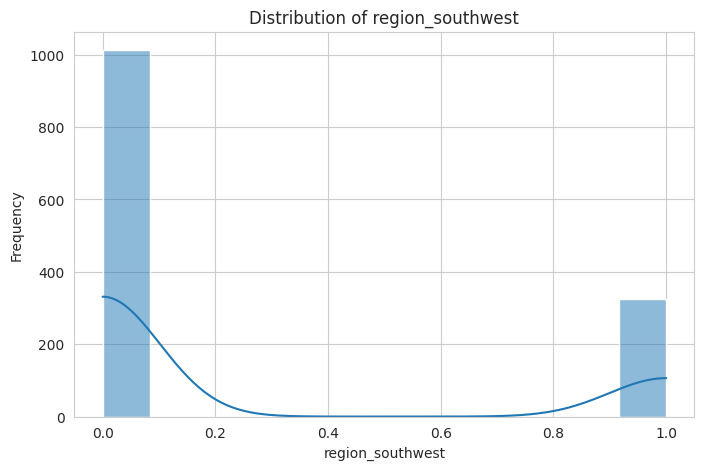

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Get the list of columns
columns = df_encoded.columns

# Convert boolean columns to integers (1s and 0s)
for col in columns:
  if df_encoded[col].dtype == 'bool':
    df_encoded[col] = df_encoded[col].astype(int)

# Plot distributions for each column
for col in columns:
    plt.figure(figsize=(8, 5))
    if df_encoded[col].dtype in ['int64', 'float64']:
        sns.histplot(df_encoded[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        sns.countplot(data=df_encoded, x=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.show()

# Task
Build a model to predict insurance charges using the dataset "insurance.csv".

## Prepare the data

### Subtask:
Separate the features (X) and the target variable (y), which is 'charges'.


**Reasoning**:
Separate the features (X) and the target variable (y) from the encoded DataFrame.



In [20]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
display(X.head())
display(y.head())

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.95,2,0,0,1,0,0
1285,47,24.32,0,0,0,0,0,0
1142,52,24.86,0,0,0,0,1,0
969,39,34.32,5,0,0,0,1,0
486,54,21.47,3,0,0,1,0,0


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25.175,2,0,0,0,0,0
887,36,30.020,0,0,0,1,0,0
890,64,26.885,0,0,1,1,0,0
1293,46,25.745,3,1,0,1,0,0
259,19,31.920,0,1,1,1,0,0


,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


## Select a model

### Subtask:
Choose a suitable regression model for predicting insurance charges.


**Reasoning**:
Choose a suitable regression model based on the problem and data characteristics. Given the nature of predicting a continuous value and the mix of numerical and one-hot encoded categorical features, a tree-based model like RandomForestRegressor is a good choice as it can handle non-linear relationships and feature interactions well.



In [22]:
from sklearn.ensemble import RandomForestRegressor

# Choose the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

## Train the model

### Subtask:
Train the selected model using the training data.


**Reasoning**:
Fit the RandomForestRegressor model to the training data.



In [23]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the model's performance using the testing data and appropriate metrics.


**Reasoning**:
Import necessary metrics, make predictions on the test set, calculate and print the evaluation metrics.



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 2550.08
Mean Squared Error (MSE): 20942520.92
R-squared (R2): 0.87


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Create a sample DataFrame with new data points that matches the structure of X_train and then use the trained model to predict the charges.



In [25]:
# Create sample new data points
new_data = pd.DataFrame({
    'age': [25, 40, 60],
    'bmi': [25.5, 30.1, 28.9],
    'children': [0, 2, 1],
    'sex_male': [0, 1, 0],
    'smoker_yes': [0, 0, 1],
    'region_northwest': [0, 1, 0],
    'region_southeast': [1, 0, 0],
    'region_southwest': [0, 0, 1]
})

# Ensure the columns are in the same order as X_train
new_data = new_data[X_train.columns]

# Predict charges for the new data
predicted_charges = model.predict(new_data)

# Display the predictions
display(predicted_charges)

array([ 3430.2378578,  6938.0195185, 28204.1875149])

## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training (80%) and testing (20%) sets.
*   A `RandomForestRegressor` model was selected and trained to predict insurance charges.
*   The model achieved a Mean Absolute Error (MAE) of 2550.08, a Mean Squared Error (MSE) of 20942520.92, and an R-squared (R2) value of 0.87 on the test set.
*   The trained model was used to predict insurance charges for new sample data points, resulting in predicted charges of approximately \$3430.24, \$6938.02, and \$28204.19 for the three sample individuals.

### Insights or Next Steps

*   The R-squared value of 0.87 suggests that the model explains a significant portion of the variance in insurance charges.
*   Further analysis could involve hyperparameter tuning of the `RandomForestRegressor` or exploring other regression models to potentially improve performance.


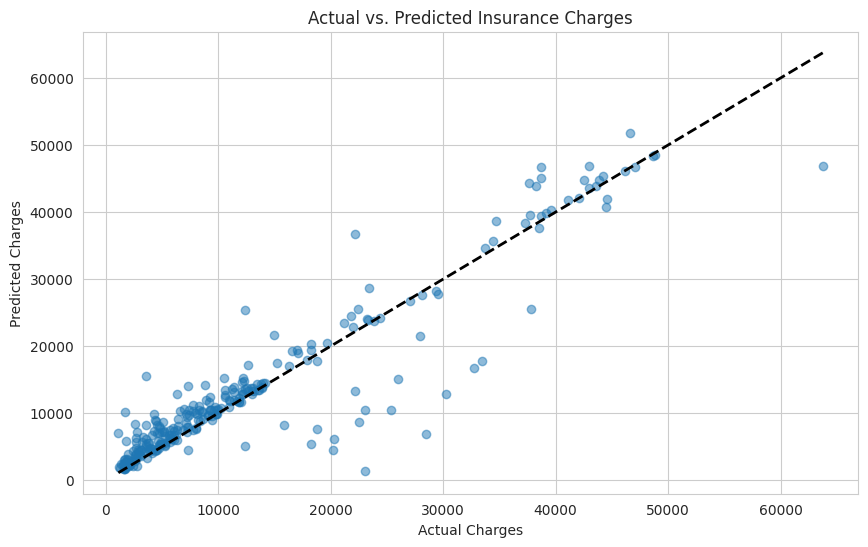

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.grid(True)

# Add a baseline (y=x line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()